# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [2]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images')

os.listdir('./')

/Users/oliverbenjaminrossi/Visual Studio/Università/Numerical-Relativity/Homework 2


['l2norm_FTCS.dat',
 'images_leapfrog',
 'images',
 'l2norm_LAXWENDROFF.dat',
 'Advection_Equation.ipynb',
 '.ipynb_checkpoints',
 'l2norm_LAX.dat',
 'l2norm_LEAPFROG.dat']

In [3]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation

while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    #FTCS Method
    
    #METHODS
    #'''
    #Lax-Friedrichs
    u_next = 0.5 * (np.roll(u_current, 1) + np.roll(u_current, -1)) - a * 0.5 * (dt/dx) * (np.roll(u_current, -1) - np.roll(u_current, 1))
    #'''
    '''
    #Leapfrog
    if(t == 0):     #First condition needs to be fixed
        u_ = 0     #Analytical solution or fetched numerically (lax friedricks) -> Zero is just fictuary
        u_next =    u_previous - (a*dt/dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    else:
        u_next =    u_previous - (a*dt/dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
        u_previous = u_current.copy
    '''

    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


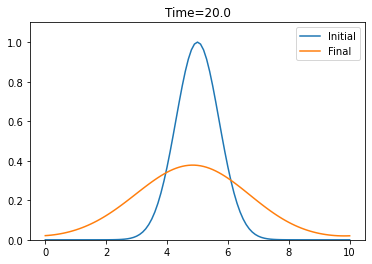

In [4]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [5]:
# set the directory where your images are stored
directory = "./images/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00070.png', 'fig_00110.png', 'fig_00310.png', 'fig_00270.png', 'fig_00260.png', 'fig_00300.png', 'fig_00100.png', 'fig_00060.png', 'fig_00370.png', 'fig_00210.png', 'fig_00010.png', 'fig_00170.png', 'fig_00400.png', 'fig_00160.png', 'fig_00000.png', 'fig_00200.png', 'fig_00360.png', 'fig_00230.png', 'fig_00350.png', 'fig_00190.png', 'fig_00390.png', 'fig_00150.png', 'fig_00030.png', 'fig_00020.png', 'fig_00140.png', 'fig_00380.png', 'fig_00180.png', 'fig_00340.png', 'fig_00220.png', 'fig_00290.png', 'fig_00130.png', 'fig_00050.png', 'fig_00250.png', 'fig_00330.png', 'fig_00090.png', 'fig_00080.png', 'fig_00320.png', 'fig_00240.png', 'fig_00040.png', 'fig_00120.png', 'fig_00280.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170

In [6]:
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images/'+file)
        writer.append_data(image)
        
files=[]


/var/folders/hz/p6990d5s151fqhq0n07rh8sm0000gn/T/ipykernel_16754/1456028087.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('./images/'+file)


In [7]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")

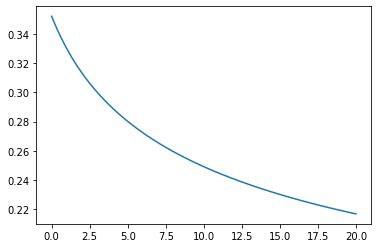

In [8]:
plt.plot(time,l2norm)
plt.show()

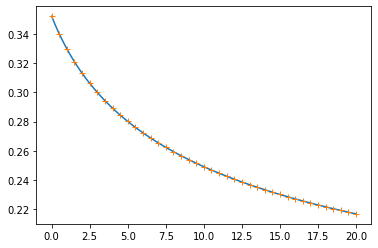

In [10]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()